### 1.importing libraries

In [7]:
import cv2
import imghdr
import tensorflow as tf
import os
from tqdm import tqdm

### 2.To go throug every single image inside the classes

In [8]:
data_dir=r'D:\classification-of-12-lead-ecgs-the-physionetcomputing-in-cardiology-challenge-2020-1.0.2\mel_spectograms\leads'
leads=os.listdir(data_dir)
for lead in tqdm(leads):
    lead_path=os.path.join(data_dir,lead)
    classes=os.listdir(lead_path)
    for class_ in classes:
        class_path=os.path.join(lead_path,class_)
        data=os.listdir(class_path)
        for file in data:
            file_path=os.path.join(class_path,file)
            print(file_path)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 19.99it/s]

D:\classification-of-12-lead-ecgs-the-physionetcomputing-in-cardiology-challenge-2020-1.0.2\mel_spectograms\leads\0\SB\FIXED_LEN_5796_FILTERED_LEAD_0_CLASS_SB_567579.png
D:\classification-of-12-lead-ecgs-the-physionetcomputing-in-cardiology-challenge-2020-1.0.2\mel_spectograms\leads\0\SB\FIXED_LEN_5796_FILTERED_LEAD_0_CLASS_SB_567590.png
D:\classification-of-12-lead-ecgs-the-physionetcomputing-in-cardiology-challenge-2020-1.0.2\mel_spectograms\leads\0\SB\FIXED_LEN_5796_FILTERED_LEAD_0_CLASS_SB_567601.png
D:\classification-of-12-lead-ecgs-the-physionetcomputing-in-cardiology-challenge-2020-1.0.2\mel_spectograms\leads\0\SB\FIXED_LEN_5796_FILTERED_LEAD_0_CLASS_SB_567612.png
D:\classification-of-12-lead-ecgs-the-physionetcomputing-in-cardiology-challenge-2020-1.0.2\mel_spectograms\leads\0\SB\FIXED_LEN_5796_FILTERED_LEAD_0_CLASS_SB_567623.png
D:\classification-of-12-lead-ecgs-the-physionetcomputing-in-cardiology-challenge-2020-1.0.2\mel_spectograms\leads\0\SB\FIXED_LEN_5796_FILTERED_LEAD_0_

#### 3.Which format of image will be accepted

In [9]:
image_exts=['jpeg','gif','bmp','png','jpg']

####  4.To know extention of image e.b jpg, pnj etc

In [11]:
tip=imghdr.what(file_path)
tip #imghdr.what is used to know the extention of image

'png'

#### 5. Remove the images with extentions other than mentioned in 3rd step

In [12]:
from tqdm import tqdm

In [15]:
for image_class in os.listdir(data_dir):
    for image in tqdm(os.listdir(os.path.join(data_dir,image_class))):
        image_path=os.path.join(data_dir,image_class,image)
        img=cv2.imread(image_path)
        tip=imghdr.what(image_path)
        if tip not in image_exts:
            print(f'Image does\'s not exits in the {image_path}')
            os.remove(image_path)
#         print("extention exists")
                
                

### 6. Image data-preprocessing

#### Example on one image

##### 6.1) imread open each image file, and reads it as an numpy array e.g. how it works is shown below

In [16]:
img_numpy=cv2.imread(os.path.join('data','happy','35438_hd.jpg'))

In [17]:
img_numpy

array([[[207, 202, 181],
        [207, 202, 181],
        [207, 202, 181],
        ...,
        [210, 206, 188],
        [210, 206, 188],
        [210, 206, 188]],

       [[207, 202, 181],
        [207, 202, 181],
        [207, 202, 181],
        ...,
        [210, 206, 188],
        [210, 206, 188],
        [210, 206, 188]],

       [[207, 202, 181],
        [207, 202, 181],
        [207, 202, 181],
        ...,
        [210, 206, 188],
        [210, 206, 188],
        [210, 206, 188]],

       ...,

       [[ 41,  35,  36],
        [ 47,  42,  41],
        [ 57,  52,  49],
        ...,
        [124, 117,  97],
        [ 97,  91,  86],
        [ 70,  62,  72]],

       [[ 51,  43,  43],
        [ 56,  51,  48],
        [ 67,  63,  58],
        ...,
        [127, 118,  98],
        [102,  93,  89],
        [ 74,  66,  76]],

       [[ 59,  50,  46],
        [ 67,  58,  54],
        [ 75,  69,  62],
        ...,
        [128, 119,  99],
        [107,  98,  89],
        [ 81,  70,  73]]

###### if 1 image is already greyscale, otherwise image is coloured

In [18]:
img_numpy.shape

(649, 1240, 3)

##### 6.2) Converting image to greyscale

In [19]:
img_numpy = tf.image.rgb_to_grayscale(img_numpy)

In [20]:
img_numpy.shape

TensorShape([649, 1240, 1])

***means an image with 649 pixels high and 1240 pixels wide and image is RGB i.e colored 3-channels**

In [21]:
import matplotlib.pyplot as plt

#### 7.Show the above numpy array image

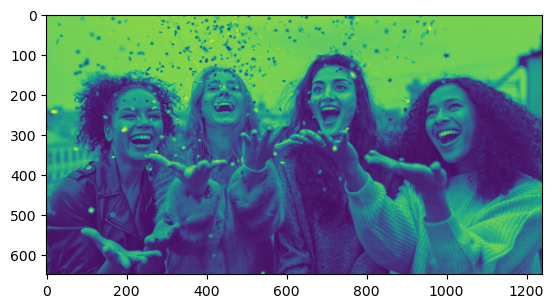

In [22]:
plt.imshow(img_numpy)

In [23]:
img_numpy.shape

TensorShape([649, 1240, 1])

######  issue in color

In [24]:
# plt.imshow(cv2.cvtColor(img_numpy,cv2.COLOR_BGR2RGB))

## Data acquisition

### 8.Loading the image-data & dividing data into 32 size batches

In [25]:
# Creating the data-pipeline
data=tf.keras.utils.image_dataset_from_directory('data',batch_size=32) #creates a dataset in memory in fly we cannot iterate directly

Found 690 files belonging to 2 classes.


In [26]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### 8.1)Provide all information about the data batches=8, image_size=256,256

In [27]:
tf.keras.utils.image_dataset_from_directory??

#### 8.2) create an iterator so that to iterate over tha dataset as dataset contains tensor

In [28]:
data_iterator=data.as_numpy_iterator()

#### 8.3) With help of data-iterator we can iterate through each batch

In [29]:
batch=data_iterator.next()

In [30]:
batch #displays batch of data if again executed gives the next batch

(array([[[[2.08000000e+02, 2.08000000e+02, 2.08000000e+02],
          [2.09714050e+02, 2.09714050e+02, 2.09714050e+02],
          [2.09183594e+02, 2.09183594e+02, 2.09183594e+02],
          ...,
          [2.09183594e+02, 2.09183594e+02, 2.09183594e+02],
          [2.09714050e+02, 2.09714050e+02, 2.09714050e+02],
          [2.08000000e+02, 2.08000000e+02, 2.08000000e+02]],
 
         [[2.08000000e+02, 2.08000000e+02, 2.08000000e+02],
          [2.09156250e+02, 2.09156250e+02, 2.09156250e+02],
          [2.08281372e+02, 2.08281372e+02, 2.08281372e+02],
          ...,
          [2.08281372e+02, 2.08281372e+02, 2.08281372e+02],
          [2.09156250e+02, 2.09156250e+02, 2.09156250e+02],
          [2.08000000e+02, 2.08000000e+02, 2.08000000e+02]],
 
         [[2.08351562e+02, 2.08351562e+02, 2.08351562e+02],
          [2.09406189e+02, 2.09406189e+02, 2.09406189e+02],
          [2.09301392e+02, 2.09301392e+02, 2.09301392e+02],
          ...,
          [2.09301392e+02, 2.09301392e+02, 2.0930

In [31]:
len(batch) #images and label =2

2

In [32]:
batch[0].shape #images represented as numpy arrays (batch_size,(image,size),channels)

(32, 256, 256, 3)

In [33]:
batch[1] #represts the labels for the images either sad or happy

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

### 9.To know which class assigned to which image


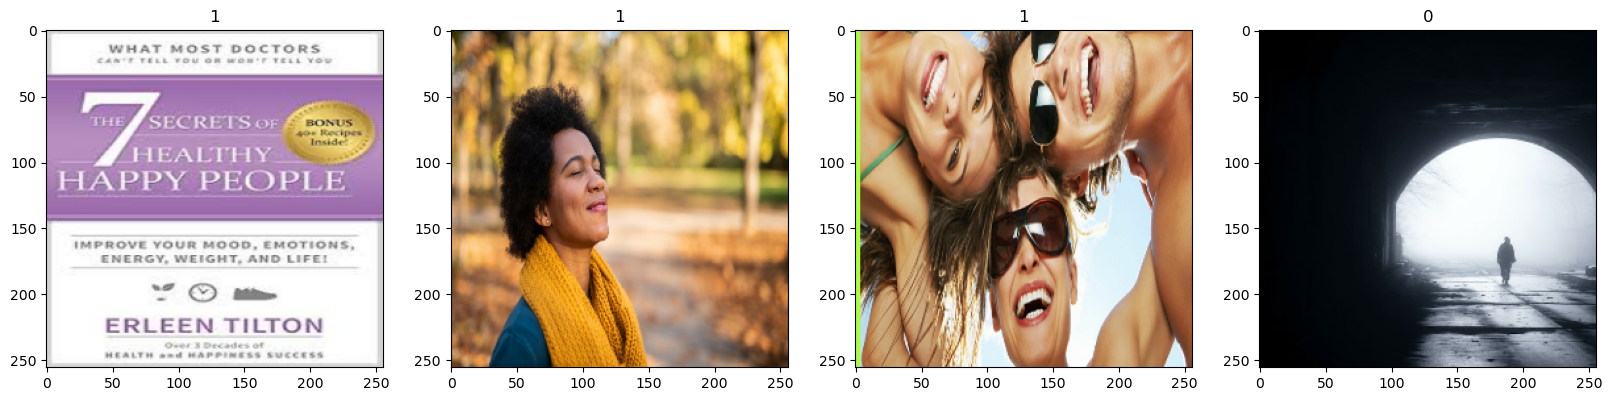

In [34]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


## 10. Data preprocessing

#### 10.1) Scaling the data

In [32]:
def preprocess_images(image,label):
    image=tf.image.rgb_to_grayscale(image)
    image=image/ 255.0
    return image,label
data=data.map(preprocess_images)

In [33]:
data_iterator=data.as_numpy_iterator()

In [34]:
batch=data_iterator.next()

In [35]:
batch[0].shape

(32, 256, 256, 1)

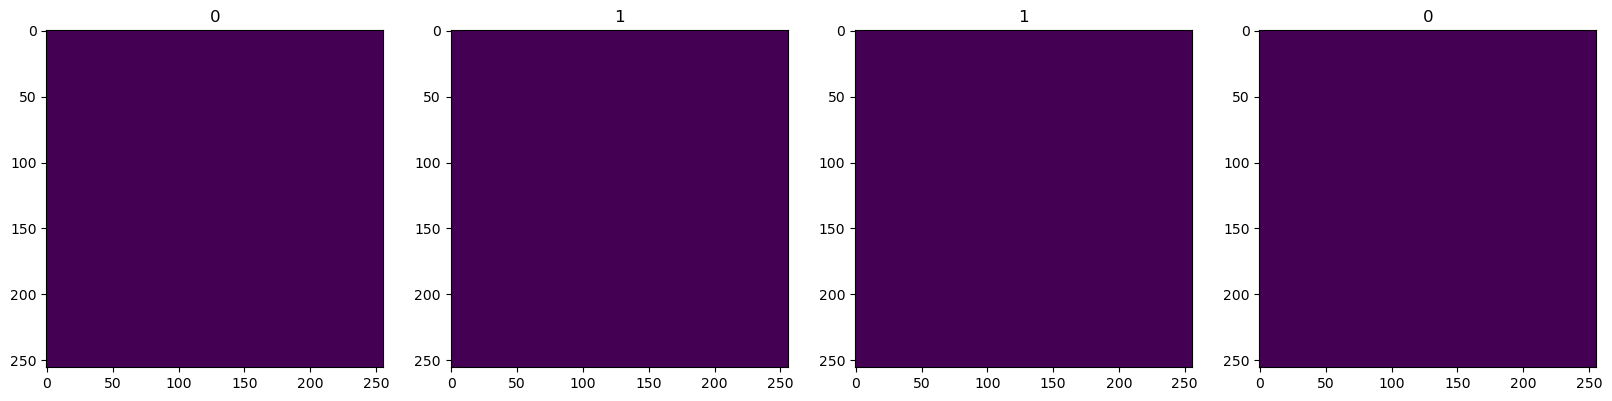

In [36]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


### Grab a batch of scaled images and labels

In [37]:
batch = data_iterator.next()
scaled_images, labels = batch   # Access the scaled images and labels

In [38]:
scaled_images.shape

(32, 256, 256, 1)

In [39]:
batch[0].shape

(32, 256, 256, 1)

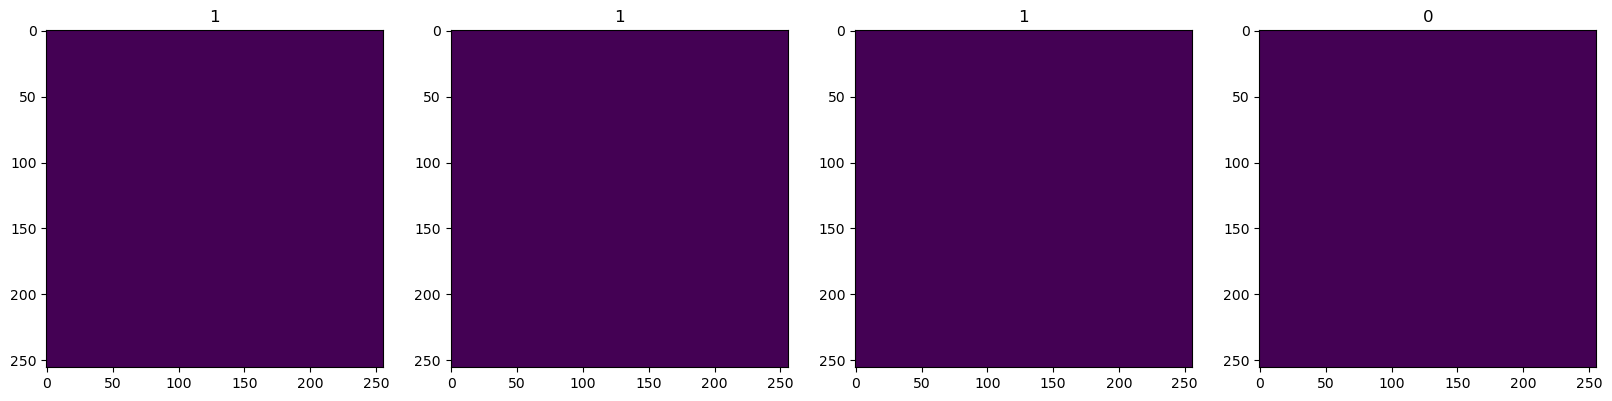

In [40]:
fig,axs=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    axs[idx].imshow(img.astype(int))
    axs[idx].title.set_text(batch[1][idx])

## split data into train,val and test

In [41]:
# Shuffle the dataset before splitting
shuffled_data = data.shuffle(buffer_size=len(data), seed=42)  # Adjust buffer_size as needed, and use a fixed seed for reproducibility

In [42]:
# Train, validation, and test split
train_size = int(len(shuffled_data) * 0.7)
val_size = int(len(shuffled_data) * 0.1)
test_size = int(len(shuffled_data) * 0.2)

In [43]:
train = shuffled_data.take(train_size)
val = shuffled_data.skip(val_size).take(val_size)
test = shuffled_data.skip(train_size + val_size).take(test_size)

## Building  a Neural network CNN

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  # Fix: Corrected the typo here

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [45]:
model.compile(optimizer='Adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

## Train

In [46]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Print dataset lengths for debugging
print("Train set length:", len(train))


Train set length: 15


In [47]:
hist = model.fit(train, epochs=30, validation_data=test, callbacks=[tensorboard_callback])

Epoch 1/30


15/15 [==============================] - 43s 2s/step - loss: 0.7175 - accuracy: 0.5579 - val_loss: 0.6710 - val_accuracy: 0.5547
Epoch 2/30
15/15 [==============================] - 40s 2s/step - loss: 0.5636 - accuracy: 0.7189 - val_loss: 0.4824 - val_accuracy: 0.7969
Epoch 3/30
15/15 [==============================] - 39s 2s/step - loss: 0.5418 - accuracy: 0.7339 - val_loss: 0.5839 - val_accuracy: 0.6484
Epoch 4/30
15/15 [==============================] - 39s 2s/step - loss: 0.5281 - accuracy: 0.7275 - val_loss: 0.5017 - val_accuracy: 0.7656
Epoch 5/30
15/15 [==============================] - 39s 2s/step - loss: 0.4425 - accuracy: 0.7854 - val_loss: 0.4255 - val_accuracy: 0.8125
Epoch 6/30
15/15 [==============================] - 39s 2s/step - loss: 0.4473 - accuracy: 0.7875 - val_loss: 0.3570 - val_accuracy: 0.8516
Epoch 7/30
15/15 [==============================] - 39s 2s/step - loss: 0.3961 - accuracy: 0.8348 - val_loss: 0.4049 - val_accuracy: 0.8047
Epoch 8/30
15/15 [

In [50]:
test_results = model.evaluate(test)

4/4 [==============================] - 16s 133ms/step - loss: 0.0012 - accuracy: 1.0000


In [51]:
# Display test metrics
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

Test Loss: 0.0011625217739492655
Test Accuracy: 1.0


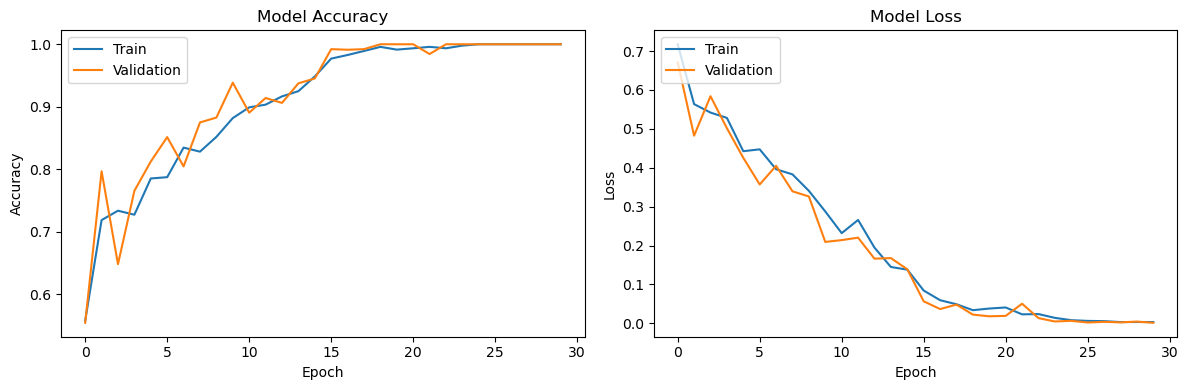

In [52]:
# Plot training history (accuracy and loss curves)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()